### ハンズオン　６－１　テンソルフローによる誤差関数

#### 6-1-1.py

In [ ]:
#tensorflowをインストールする必要あり
#Google Colaboでの利用を推奨

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#データの生成 y = 33 x + 5　で10個生成する
data_set = []
[data_set.append(33 * x + 5) for x in range(10)]

#プレイスホルダーの定義
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
y = tf.matmul(x, w) #xとw(Variable)のかけ算をyとする
#Placeholderの定義
t = tf.placeholder(tf.float32, [None, 1])
#誤差関数の定義　 教師データｔにyを二乗近似する
loss = tf.reduce_sum(tf.square(y - t))
#誤差関数に勾配降下法Adamを利用
train_step = tf.train.AdamOptimizer().minimize(loss)


#### 6-1-2.py

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#教師データtに値を代入、TensorFlowのフォーマットに合わせる
train_t = np.array(data_set);
train_t = train_t.reshape([10, 1])
train_x = np.zeros([10, 2])
for row in range(10):
    for col in range(2):
        train_x[row][col] = row**col
              
i = 0
for _ in range(100000):
    i += 1
    #勾配降下法でパラメータ更新
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    #1万回に一度誤差結果表示
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f' % (i, loss_val))
          

#近似値を出力
w_val = sess.run(w)
print (w_val)


Step: 10000, Loss 145626.375000
Step: 20000, Loss 39952.503906
Step: 30000, Loss 2620.265625
Step: 40000, Loss 525.348511
Step: 50000, Loss 58.248909
Step: 60000, Loss 0.000000
Step: 70000, Loss 0.000000
Step: 80000, Loss 0.000000
Step: 90000, Loss 0.000000
Step: 100000, Loss 0.000000


###  ハンズオン６－２　活性化関数

#### 6-2-1.py

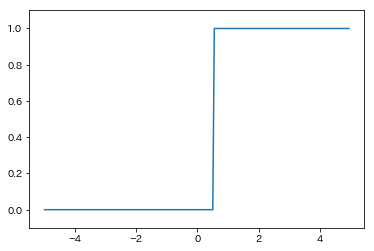

In [2]:
import numpy as np
import matplotlib.pylab as plt

#ステップ関数
def step_function(x):
  y = x > 0.5
  return y.astype(np.int)

x = np.arange(-5.0, 5.0, 0.05)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 6-2-2.py

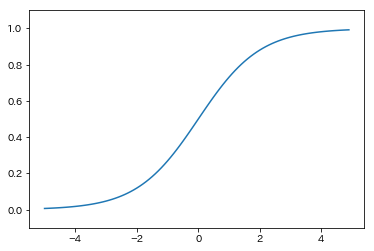

In [3]:
import numpy as np
import matplotlib.pylab as plt

#シグモイド関数
def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 6-2-3.py

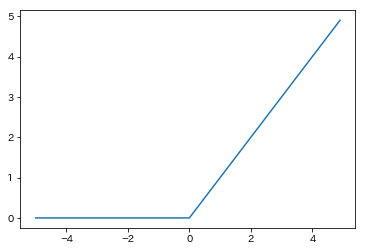

In [4]:
import numpy as np
import matplotlib.pylab as plt

#ReLU関数
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()